# Problem Statement

Deepen understanding of the challenges in real-world machine learning, specifically in multi-label classification, by utilizing advanced non-linear dimensionality
reduction techniques such as t-SNE and Isomap.

# Preprocessing and Initial Setup

## Data Loading

In [109]:
import pandas as pd
from scipy.io import arff
import io
import numpy as np

In [64]:
data, meta = arff.loadarff('yeast/yeast.arff')

df = pd.DataFrame(data)
print(f"The shape of the dataset is: {df.shape}")

The shape of the dataset is: (2417, 117)


In [65]:
df.head(10)

Att1      Att2      Att3      Att4      Att5      Att6      Att7  \
0  0.004168 -0.170975 -0.156748 -0.142151  0.058781  0.026851  0.197719   
1 -0.103956  0.011879 -0.098986 -0.054501 -0.007970  0.049113 -0.030580   
2  0.509949  0.401709  0.293799  0.087714  0.011686 -0.006411 -0.006255   
3  0.119092  0.004412 -0.002262  0.072254  0.044512 -0.051467  0.074686   
4  0.042037  0.007054 -0.069483  0.081015 -0.048207  0.089446 -0.004947   
5  0.003286 -0.023601 -0.023104 -0.064171 -0.017719 -0.113510 -0.035212   
6  0.076606 -0.025478  0.072419 -0.065383  0.123539  0.120130  0.102248   
7 -0.106801 -0.069277 -0.132254 -0.099246 -0.188413 -0.110359 -0.155120   
8  0.177650  0.136159  0.153211  0.190312  0.158541  0.219521  0.079914   
9  0.122075 -0.055828 -0.034775 -0.039235  0.075027  0.087308  0.088062   

       Att8      Att9     Att10  ...  Class5  Class6  Class7  Class8  Class9  \
0  0.041850  0.066938 -0.056617  ...    b'0'    b'0'    b'1'    b'1'    b'0'   
1 -0.077933 -0.080529 -0.016267  ...    b'0'    b'0'    b'0'    b'0'    b'0'   
2  0.013646 -0.040666 -0.024447  ...    b'0'    b'0'    b'0'    b'0'    b'0'   
3 -0.007670  0.079438  0.062184  ...    b'0'    b'0'    b'0'    b'0'    b'0'   
4  0.064456 -0.133387  0.068878  ...    b'1'    b'1'    b'0'    b'0'    b'0'   
5 -0.077675 -0.024348 -0.012458  ...    b'0'    b'0'    b'0'    b'0'    b'0'   
6  0.008324  0.094147 -0.014666  ...    b'0'    b'0'    b'0'    b'0'    b'0'   
7 -0.168094 -0.182473  0.023208  ...    b'0'    b'0'    b'0'    b'0'    b'0'   
8  0.232238  0.127932  0.089142  ...    b'0'    b'0'    b'0'    b'0'    b'0'   
9  0.122385  0.091848 -0.099132  ...    b'0'    b'0'    b'0'    b'0'    b'0'   

   Class10  Class11  Class12  Class13  Class14  
0     b'0'     b'0'     b'1'     b'1'     b'0'  
1     b'0'     b'0'     b'0'     b'0'     b'0'  
2     b'0'     b'0'     b'1'     b'1'     b'0'  
3     b'0'     b'0'     b'0'     b'0'     b'0'  
4     b'0'     b'0'     b'0'     b'0'     b'0'  
5     b'1'     b'1'     b'1'     b'1'     b'0'  
6     b'0'     b'0'     b'1'     b'1'     b'0'  
7     b'0'     b'0'     b'1'     b'1'     b'0'  
8     b'0'     b'0'     b'1'     b'1'     b'0'  
9     b'0'     b'0'     b'1'     b'1'     b'0'  

[10 rows x 117 columns]

In [66]:
# To convert the labels to integers
for col in df.select_dtypes([object]).columns:
    df[col] = df[col].str.decode('utf-8').astype(int)

# Display the first few rows to verify
print("DataFrame successfully loaded from ARFF.")
df.head(10)

DataFrame successfully loaded from ARFF.


Att1      Att2      Att3      Att4      Att5      Att6      Att7  \
0  0.004168 -0.170975 -0.156748 -0.142151  0.058781  0.026851  0.197719   
1 -0.103956  0.011879 -0.098986 -0.054501 -0.007970  0.049113 -0.030580   
2  0.509949  0.401709  0.293799  0.087714  0.011686 -0.006411 -0.006255   
3  0.119092  0.004412 -0.002262  0.072254  0.044512 -0.051467  0.074686   
4  0.042037  0.007054 -0.069483  0.081015 -0.048207  0.089446 -0.004947   
5  0.003286 -0.023601 -0.023104 -0.064171 -0.017719 -0.113510 -0.035212   
6  0.076606 -0.025478  0.072419 -0.065383  0.123539  0.120130  0.102248   
7 -0.106801 -0.069277 -0.132254 -0.099246 -0.188413 -0.110359 -0.155120   
8  0.177650  0.136159  0.153211  0.190312  0.158541  0.219521  0.079914   
9  0.122075 -0.055828 -0.034775 -0.039235  0.075027  0.087308  0.088062   

       Att8      Att9     Att10  ...  Class5  Class6  Class7  Class8  Class9  \
0  0.041850  0.066938 -0.056617  ...       0       0       1       1       0   
1 -0.077933 -0.080529 -0.016267  ...       0       0       0       0       0   
2  0.013646 -0.040666 -0.024447  ...       0       0       0       0       0   
3 -0.007670  0.079438  0.062184  ...       0       0       0       0       0   
4  0.064456 -0.133387  0.068878  ...       1       1       0       0       0   
5 -0.077675 -0.024348 -0.012458  ...       0       0       0       0       0   
6  0.008324  0.094147 -0.014666  ...       0       0       0       0       0   
7 -0.168094 -0.182473  0.023208  ...       0       0       0       0       0   
8  0.232238  0.127932  0.089142  ...       0       0       0       0       0   
9  0.122385  0.091848 -0.099132  ...       0       0       0       0       0   

   Class10  Class11  Class12  Class13  Class14  
0        0        0        1        1        0  
1        0        0        0        0        0  
2        0        0        1        1        0  
3        0        0        0        0        0  
4        0        0        0        0        0  
5        1        1        1        1        0  
6        0        0        1        1        0  
7        0        0        1        1        0  
8        0        0        1        1        0  
9        0        0        1        1        0  

[10 rows x 117 columns]

In [70]:
X = df.iloc[:, :-14]
Y = df.iloc[:, -14:]

print(f"The shape of the feature matrix is: {X.shape}")
print(f"The shape of the label matrix is: {Y.shape}")

The shape of the feature matrix is: (2417, 103)
The shape of the label matrix is: (2417, 14)


## Dimensionality Check

There are a total of **103 features** and **2417 datapoints**.

## Label Selection for Visualization

In [90]:
label_combinations = Y.apply(tuple, axis=1)

combination_counts = label_combinations.value_counts()
most_frequent_combination = combination_counts.sort_values(ascending=False).keys()[0]
print(most_frequent_combination)

(0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0)


In [92]:
print(f"The most frequent label combination is: {most_frequent_combination}")
print(f"The number of occurrences of this combination is: {combination_counts[most_frequent_combination]}")

The most frequent label combination is: (0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0)
The number of occurrences of this combination is: 237


In [ ]:
def is_single_label(label_tuple):
    return sum(label_tuple) == 1

single_label_counts = combination_counts[combination_counts.index.map(is_single_label)]

print(single_label_counts[:2])

(1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)    32
Name: count, dtype: int64


From the above code segment, we can see that there is only one class that occurs by itself, which is Class 1, and it appears alone 32 times.

In [99]:
most_frequent_single_label = single_label_counts.index[0]

In [100]:
# --- Placeholder Setup ---

# First Most Frequent Single-Label Tuple
SINGLE_1_TUPLE = most_frequent_single_label

# Most Frequent Multi-Label Combination Tuple
COMBO_TUPLE = most_frequent_combination

In [129]:
def get_new_labels(Y):
    Y_tuples = Y.apply(tuple, axis=1)

    Y_hat = pd.DataFrame(data=np.zeros(shape=(Y.shape[0], 3)), columns=['Class 1 Only', 'Most Frequent Combination', 'Other'])

    for i, y_tuple in enumerate(Y_tuples):
        if (y_tuple == SINGLE_1_TUPLE):
            Y_hat.loc[i, 'Class 1 Only'] = 1
        elif (y_tuple == COMBO_TUPLE):
            Y_hat.loc[i, 'Most Frequent Combination'] = 1
        else:
            Y_hat.loc[i, 'Other'] = 1
    
    return Y_hat

In [130]:
Y_hat = get_new_labels(Y)

In [131]:
Y_hat.head(10)

Class 1 Only  Most Frequent Combination  Other
0           0.0                        0.0    1.0
1           0.0                        0.0    1.0
2           0.0                        0.0    1.0
3           0.0                        0.0    1.0
4           0.0                        0.0    1.0
5           0.0                        0.0    1.0
6           0.0                        0.0    1.0
7           0.0                        0.0    1.0
8           0.0                        0.0    1.0
9           0.0                        1.0    0.0

## Scaling

In [132]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**Feature dominance** is the primary reason scaling is crucial before applying distance-based algorithms like PCA. It occurs when a feature with a **larger range of values** (higher magnitude) dictates the outcome of the distance calculations, overwhelming features with smaller ranges. Because algorithms like PCA are based on maximizing variance, and variance is proportional to scale, the high-magnitude feature will automatically dominate the principal components, regardless of its actual importance to the data's underlying structure.

# t-SNE and Veracity Inspection

## t-SNE Implementation

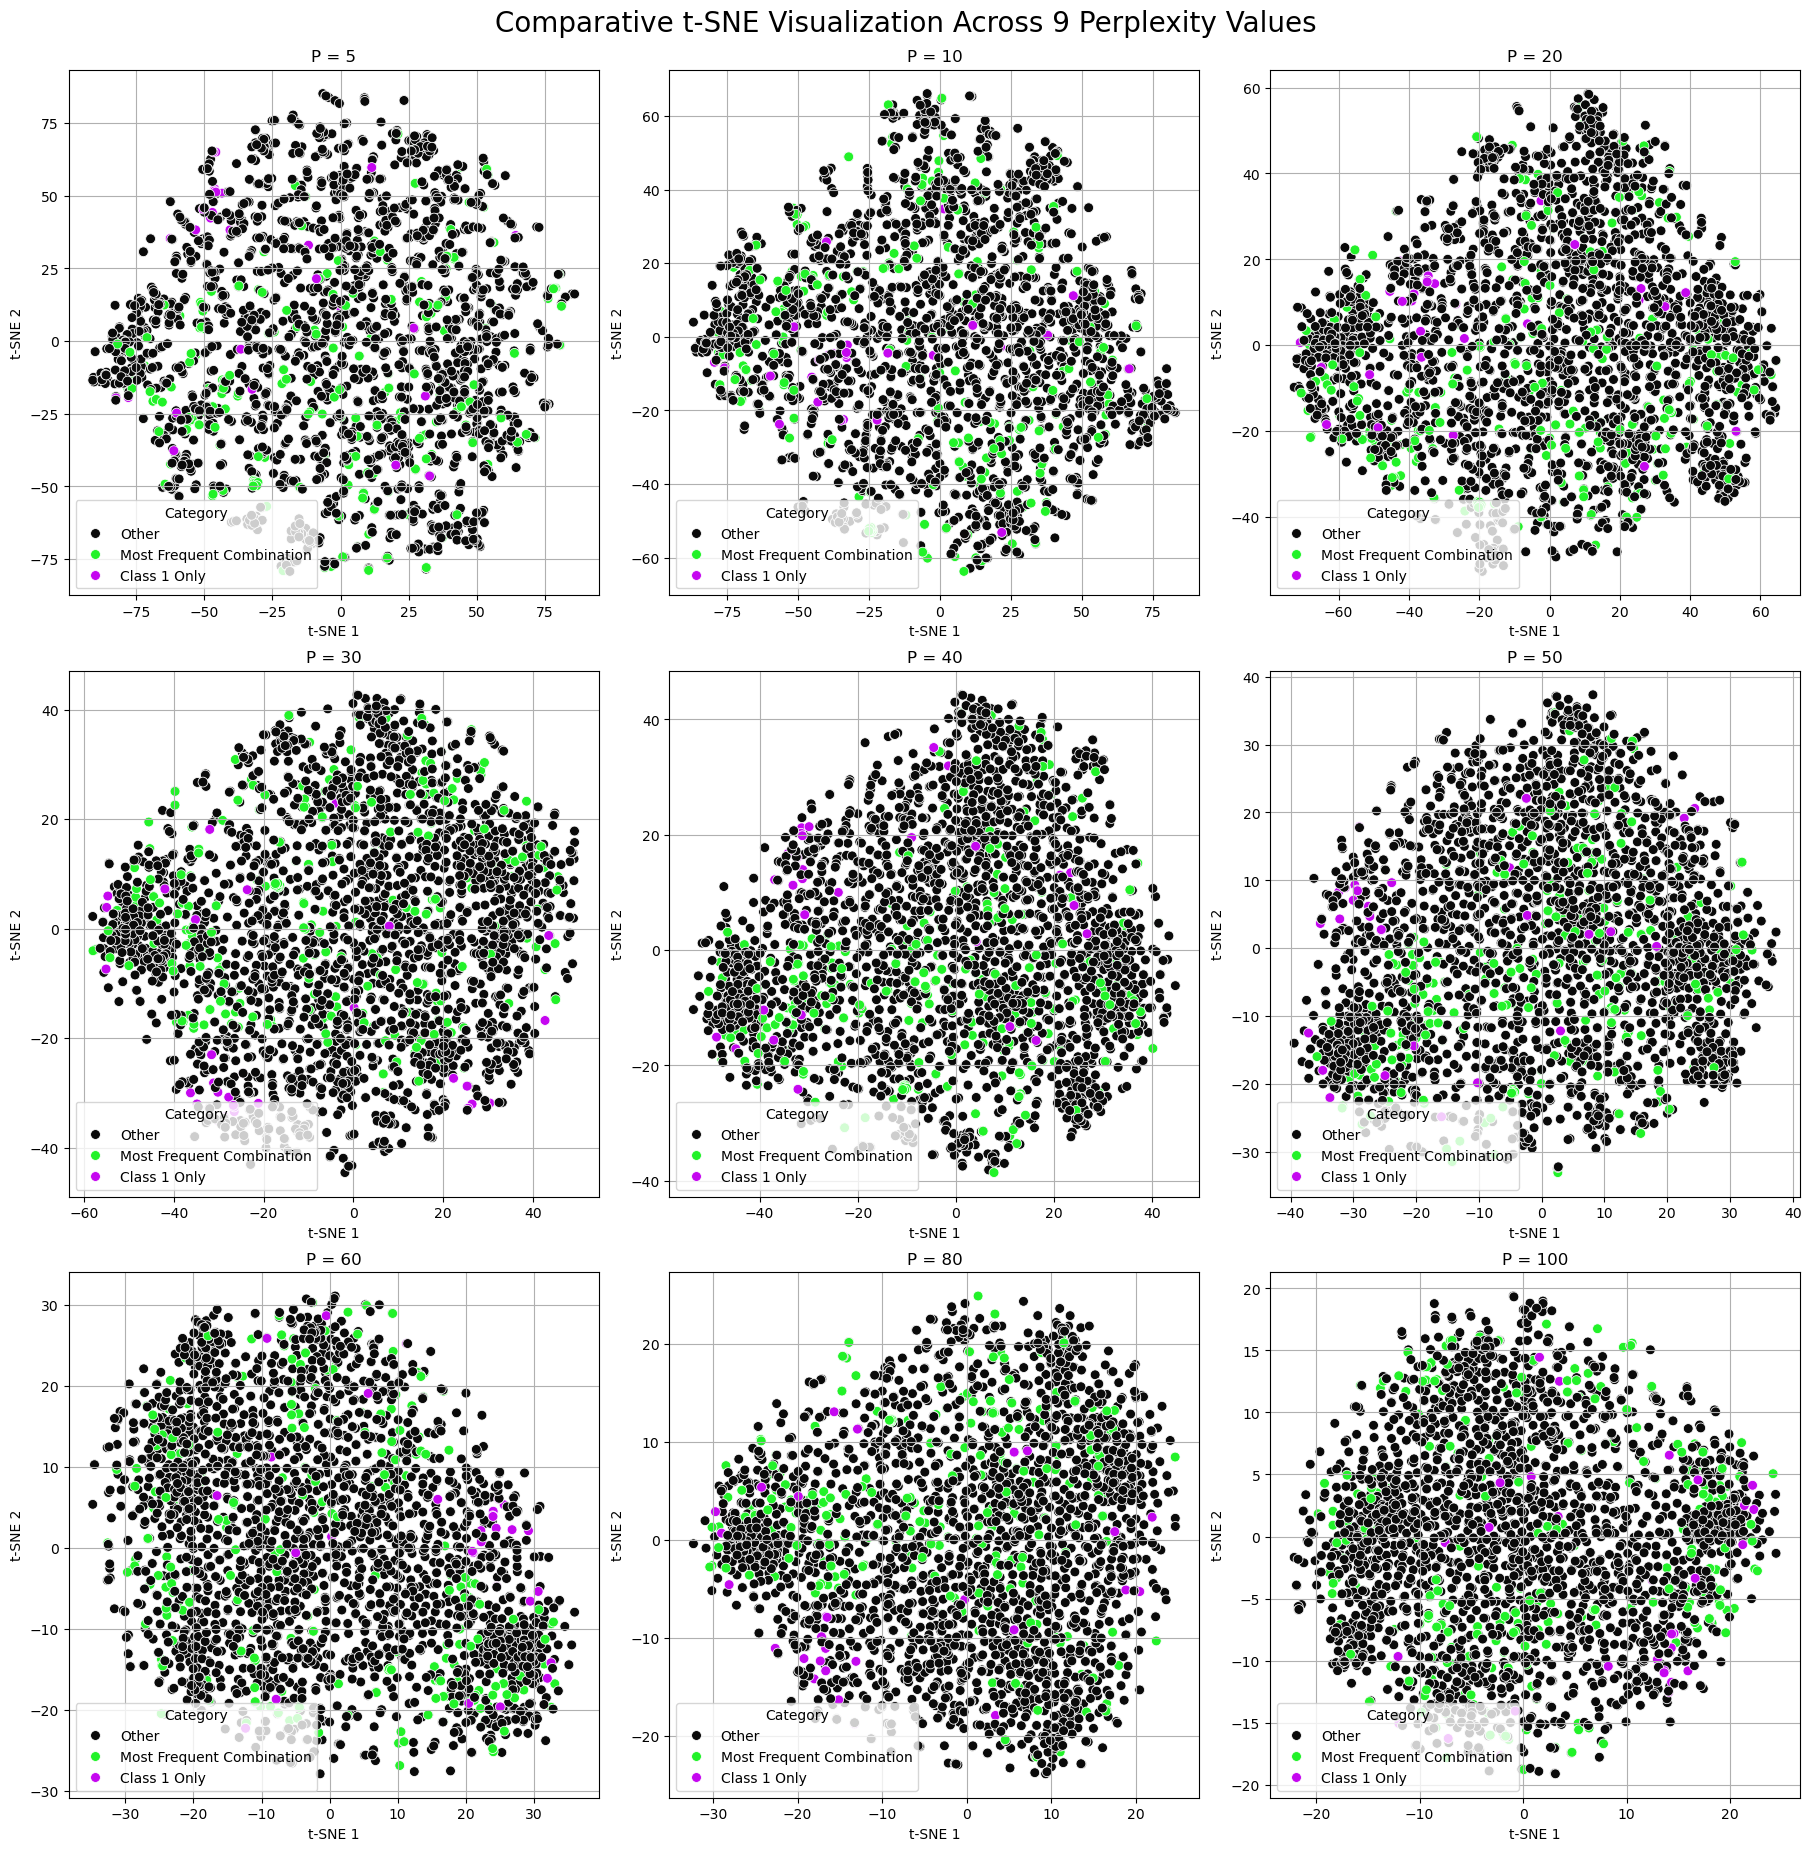

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

Y_color_vector = Y_hat.idxmax(axis=1)

# Define the 9 perplexity values for the 3x3 grid
PERPLEXITIES = [5, 10, 20, 30, 40, 50, 60, 80, 100]

# Define the custom color palette
custom_palette = {
    'Class 1 Only': '#c507f0',  # Pink
    'Most Frequent Combination':  '#22f229',  # Green
    'Other':       '#0a0a0a'   # Black
}

alpha_settings = {
    'Class 1 Only': 1.0,  # Fully opaque
    'Most Frequent Combination': 1.0,  # Fully opaque
    'Other':       0.15   # 15% opacity for 'Other' class
}

# --- Create the 3x3 Grid of Subplots ---
# 3 rows, 3 columns, with a larger overall figure size
fig, axes = plt.subplots(3, 3, figsize=(18, 18), constrained_layout=True)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Title and Story containers
main_title = 'Comparative t-SNE Visualization Across 9 Perplexity Values'

# Loop through all 9 perplexity values and plot each one
for i, perplexity in enumerate(PERPLEXITIES):
    ax = axes[i]

    # 1. Apply t-SNE
    # max_iter=1000 is used
    tsne = TSNE(
        n_components=2, 
        perplexity=perplexity, 
        max_iter=1000, 
        random_state=42, 
        n_jobs=-1, 
        learning_rate='auto'
    )
    X_tsne = tsne.fit_transform(X_scaled)

    # 2. Create DataFrame for plotting
    df_tsne = pd.DataFrame(X_tsne, columns=['TSNE_1', 'TSNE_2'])
    df_tsne['Label'] = Y_color_vector

    # 3. Plotting adhering to rules
    sns.scatterplot(
        x='TSNE_1', 
        y='TSNE_2', 
        hue='Label', 
        data=df_tsne,
        s=50, # Smaller points for a denser plot
        palette=custom_palette,
        alpha=alpha_settings[label]
        ax=ax,
        legend='full'
    )
    
    # Set titles and labels for the individual subplot
    ax.set_title(f'P = {perplexity}', fontsize=12)
    ax.set_xlabel('t-SNE 1', fontsize=10)
    ax.set_ylabel('t-SNE 2', fontsize=10)
    ax.grid(True)
    
    ax.legend(title='Category', loc='lower left', fontsize=10)
    
fig.suptitle(main_title, fontsize=20, y=1.02)
plt.show()

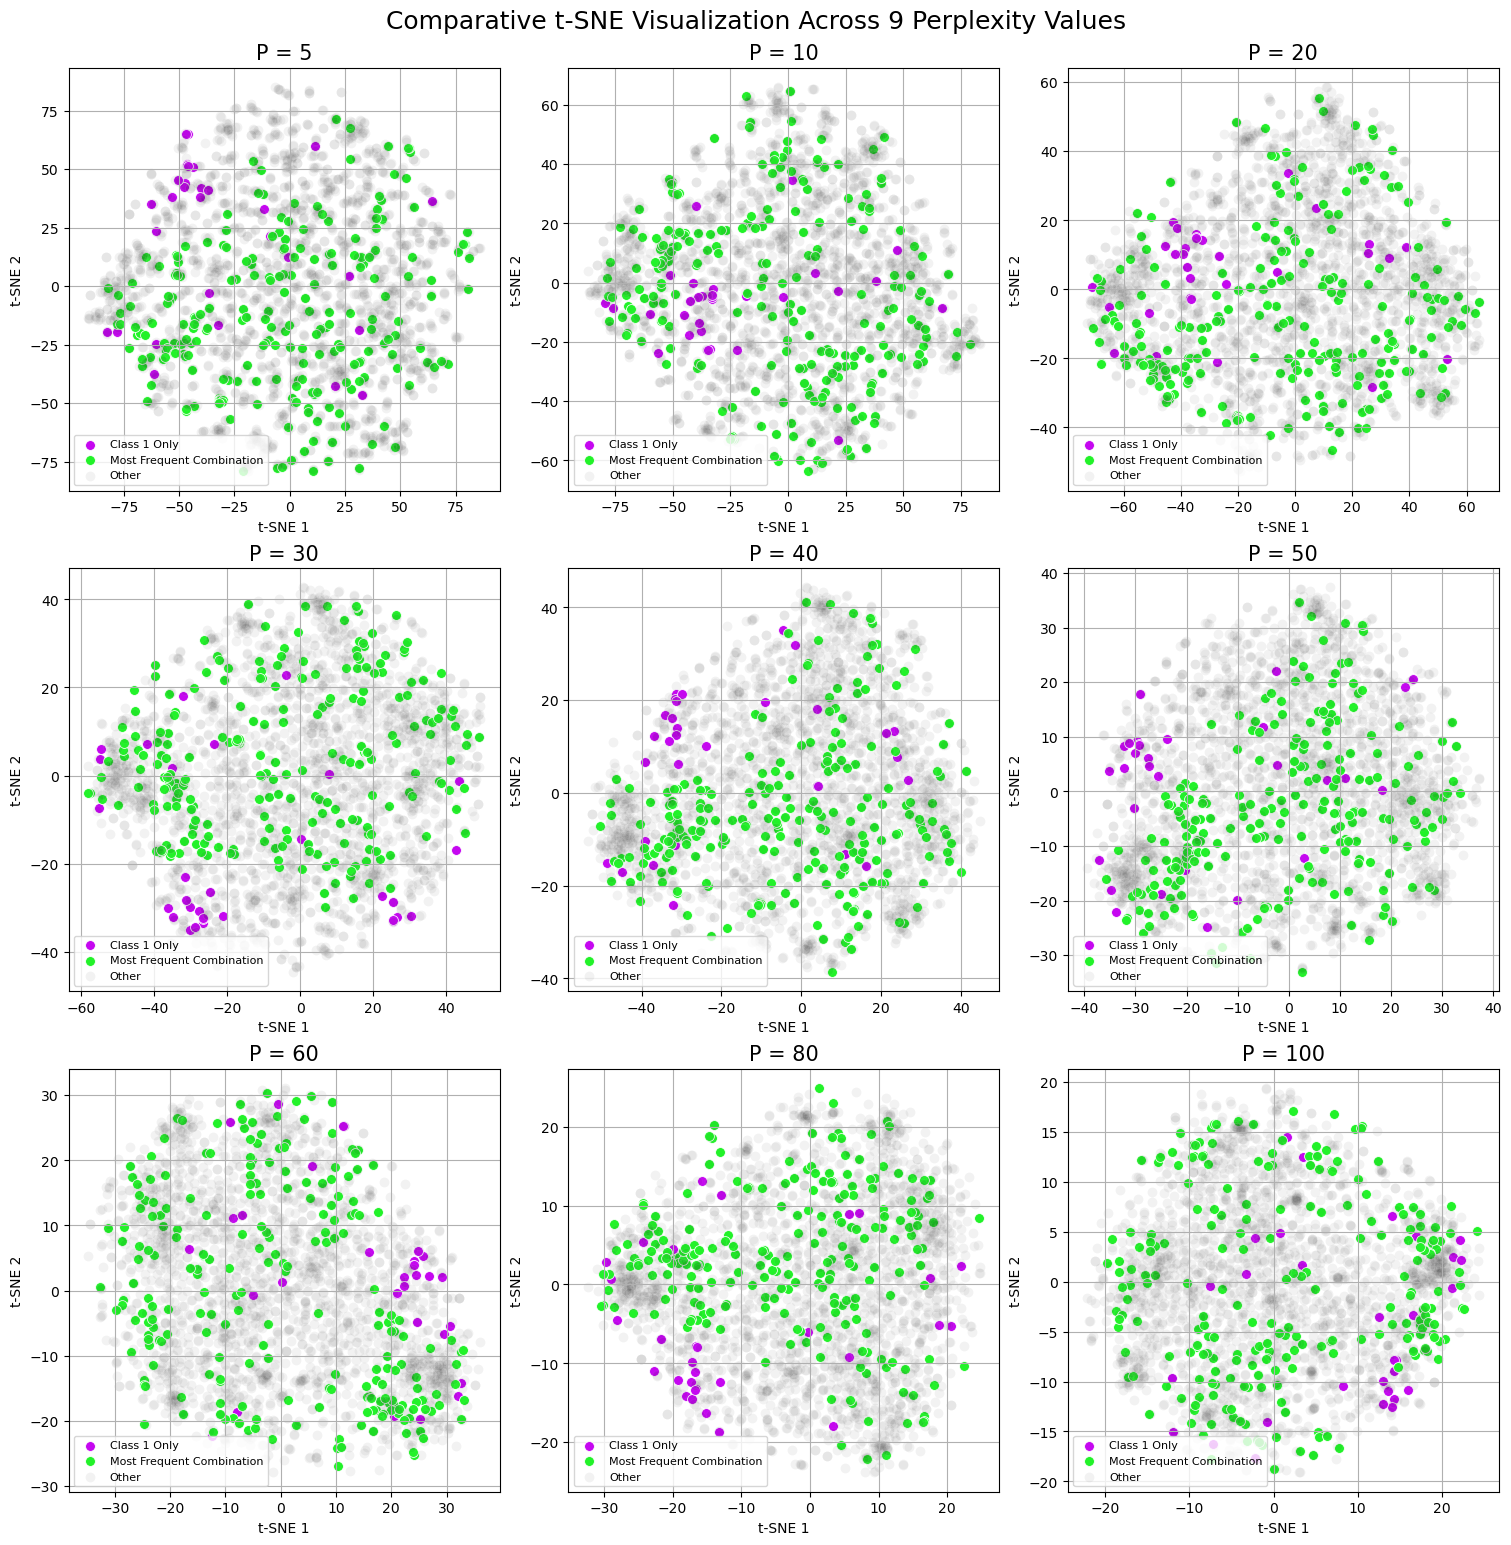

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
import pandas as pd # Make sure pandas is imported

# Define the 9 perplexity values for the 3x3 grid
PERPLEXITIES = [5, 10, 20, 30, 40, 50, 60, 80, 100]

# Define the custom color palette
custom_palette = {
    'Class 1 Only': '#c507f0',  # Pink
    'Most Frequent Combination':  '#22f229',  # Green
    'Other':       '#0a0a0a'   # Black
}

# Define alpha values for each category
alpha_settings = {
    'Class 1 Only': 1.0,  # Fully opaque
    'Most Frequent Combination': 1.0,  # Fully opaque
    'Other':       0.05   # 15% opacity for 'Other' class
}

# --- Create the 3x3 Grid of Subplots ---
fig, axes = plt.subplots(3, 3, figsize=(15, 15), constrained_layout=True)
axes = axes.flatten()

main_title = 'Comparative t-SNE Visualization Across 9 Perplexity Values'

for i, perplexity in enumerate(PERPLEXITIES):
    ax = axes[i]

    # 1. Apply t-SNE
    tsne = TSNE(
        n_components=2, 
        perplexity=perplexity, 
        max_iter=1000, 
        random_state=42, 
        n_jobs=-1, 
        learning_rate='auto'
    )
    X_tsne = tsne.fit_transform(X_scaled)

    # 2. Create DataFrame for plotting
    df_tsne = pd.DataFrame(X_tsne, columns=['TSNE_1', 'TSNE_2'])
    df_tsne['Label'] = Y_color_vector

    # 3. Plotting each category separately to control alpha
    for label, color in custom_palette.items():
        subset_df = df_tsne[df_tsne['Label'] == label]
        sns.scatterplot(
            x='TSNE_1', 
            y='TSNE_2', 
            data=subset_df,
            color=color, # Use 'color' here instead of 'hue'
            s=50, 
            alpha=alpha_settings[label], # Apply specific alpha
            ax=ax,
            label=label # Add label for manual legend
        )
    
    ax.set_title(f'P = {perplexity}', fontsize=15)
    ax.set_xlabel('t-SNE 1', fontsize=10)
    ax.set_ylabel('t-SNE 2', fontsize=10)
    ax.grid(True)
    
    # Manually create the legend, as plotting separately can affect it
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles=handles, labels=labels, loc='lower left', fontsize=8)
    
fig.suptitle(main_title, fontsize=18, y=1.02)
plt.show()

I think the plot with **Perplexity (P) = 50** is the best and most informative visualization in this set. The adjusted transparency works beautifully to highlight the classes of interest.

#### Why is P = 50 is the best?

1.  **Excellent Balance:** This plot strikes the perfect balance between **local and global structure**. It doesn't fracture the data into meaningless small clumps like the low-perplexity plots (P=5, P=10), nor does it crowd everything into a single, unreadable mass like the high-perplexity plots (P=80, P=100).

2.  **Clear Cluster Separation:** The clusters of the _Most Frequent Combination_ (green points) are distinct and well-defined. One can clearly see several separate groupings, which suggests there are meaningful sub-types within that category.

3.  **Meaningful Story:** The visualization tells a clear story: the green points form tight, coherent groups, indicating they are similar to one another. The magenta points (_Class 1 Only_) are more scattered, suggesting they are a more diverse group. The transparent _Other_ points provide excellent context for the overall data shape.

#### Comparison with Other Values

* **Too Low (P = 5-20):** These plots focus too much on local neighbors, resulting in a noisy and fragmented view that doesn't reveal the larger patterns in the data.
* **Too High (P = 60-100):** These plots over-emphasize the global structure, causing distinct clusters to merge and lose their definition. This "crowding" effect hides the valuable details that are visible at P=40.

## Visualization

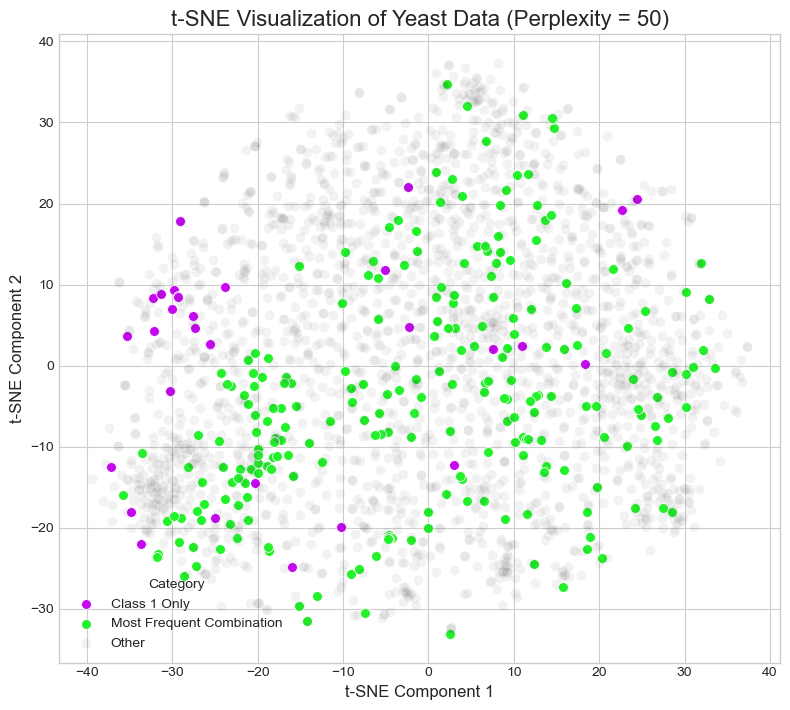

In [ ]:
# Define the custom color palette
custom_palette = {
    'Class 1 Only': '#c507f0',  # Pink
    'Most Frequent Combination':  '#22f229',  # Green
    'Other':       '#0a0a0a'   # Black
}

# Define alpha values for each category
alpha_settings = {
    'Class 1 Only': 1.0,
    'Most Frequent Combination': 1.0,
    'Other':       0.05
}

def plot_single_tsne(X_scaled, Y_color_vector, perplexity):
    """
    Applies t-SNE to the scaled feature matrix and generates a single, color-coded
    visualization plot based on predefined color and alpha settings.

    Args:
        X_scaled (np.array or pd.DataFrame): The standardized feature matrix.
        Y_color_vector (pd.Series): The single-label vector for coloring (hue).
        perplexity (int): The perplexity value for the t-SNE computation.
    """
    # Set the plotting style for consistency
    plt.style.use('seaborn-v0_8-whitegrid')
    
    # 1. Apply t-SNE
    # max_iter is used for compatibility with modern scikit-learn
    tsne = TSNE(
        n_components=2, 
        perplexity=perplexity, 
        max_iter=1000, 
        random_state=42, 
        n_jobs=-1, 
        learning_rate='auto'
    )
    X_tsne = tsne.fit_transform(X_scaled)

    # 2. Create DataFrame for plotting
    df_tsne = pd.DataFrame(X_tsne, columns=['tSNE_C1', 'tSNE_C2'])
    df_tsne['Label'] = Y_color_vector
    
    # 3. Initialize Plot
    fig, ax = plt.subplots(figsize=(8, 8))
    
    # 4. Plotting each category separately to control alpha (opacity)
    for label, color in custom_palette.items():
        subset_df = df_tsne[df_tsne['Label'] == label]
        sns.scatterplot(
            x='tSNE_C1', 
            y='tSNE_C2', 
            data=subset_df,
            color=color, # Use 'color' here to ensure consistent alpha control
            s=50, 
            alpha=alpha_settings[label], # Apply specific alpha from settings
            ax=ax,
            label=label, # Add label for manual legend
            marker='o' # Ensure consistent marker type
        )
    
    # 5. Apply Visualization Rules (Titles, Labels, Legend, Story)
    title_text = f"t-SNE Visualization of Yeast Data (Perplexity = {perplexity})"
    
    ax.set_title(title_text, fontsize=16)
    
    ax.set_xlabel('t-SNE Component 1', fontsize=12)
    ax.set_ylabel('t-SNE Component 2', fontsize=12)
    ax.grid(True)
    
    # Finalize Legend (using the handles and labels created in the loop)
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles=handles, labels=labels, title='Category', loc='lower left', fontsize=10)
    
    plt.tight_layout(rect=[0, 0.05, 1, 0.95])
    plt.show()

plot_single_tsne(X_scaled,  Y_color_vector, perplexity=50)

## Veracity Inspection

#### **Noisy/Ambiguous Labels**

Visually, noisy or ambiguous labels are points that are located deep within a cluster of a different color. The t-SNE algorithm places them there because their *features* are highly similar to their neighbors, even though their assigned label is different.

* **Observation:** There are several magenta points (_Class 1 Only_) located in the middle of dense green clusters (_Most Frequent Combination_). For example, the point near coordinates _(t-SNE 1 ≈ -10, t-SNE 2 ≈ 0)_ is a magenta point surrounded entirely by a sea of green.
* **Implication:** This suggests that this specific protein has features that are nearly identical to proteins with the 'Most Frequent Combination' label. This could be a **labeling error** in the dataset (noise) or a genuinely **ambiguous case** where the protein's function is on the borderline between the two categories.

#### **Outliers**

Outliers are points or small groups of points that are isolated and far from the main data clusters. This distance in the 2D plot implies they are very different in the original high-dimensional feature space.

* **Observation:**
    * Several magenta points are significant outliers, such as the one on the far left at **(t-SNE 1 ≈ -35, t-SNE 2 ≈ -15)** and another on the upper right at **(t-SNE 1 ≈ 25, t-SNE 2 ≈ 20)**.
    * There is also a tiny, distant cluster of green points on the far right around **(t-SNE 1 ≈ 35, t-SNE 2 ≈ 5)**.
* **Hypothesis:** These outliers could represent:
    * **Unique Biological Functions:** The isolated magenta points may be proteins with highly specialized or rare functional patterns not seen elsewhere in the dataset.
    * **Rare Sub-families:** The tiny, distant green cluster might be a small group of proteins that, while sharing the 'Most Frequent Combination' label, have a unique expression pattern that distinguishes them from all other proteins with that same label.
    * **Data Errors:** Outliers can also stem from measurement errors or artifacts from the data collection process.

#### **Hard-to-Learn Samples**

These are found in regions where points from different categories are heavily intermingled, making it impossible to draw a clean boundary between them.

* **Observation:** The central region of the plot, particularly between **t-SNE 1 from -20 to 20**, shows a significant mixing of green, magenta, and light gray points. There is no clear separation; instead, the categories blend into one another.
* **Explanation:** A simple classifier (like logistic regression or a linear SVM) works by finding a simple geometric boundary (e.g., a line or a plane) to separate classes. In these mixed regions, the classes are **not linearly separable**. Any simple line drawn through this area will inevitably misclassify a large number of points. To achieve high accuracy here, a more complex, **non-linear model** would be required to learn the intricate and convoluted boundary between the classes.

# Isomap and Manifold Learning

## Isomap Implementation

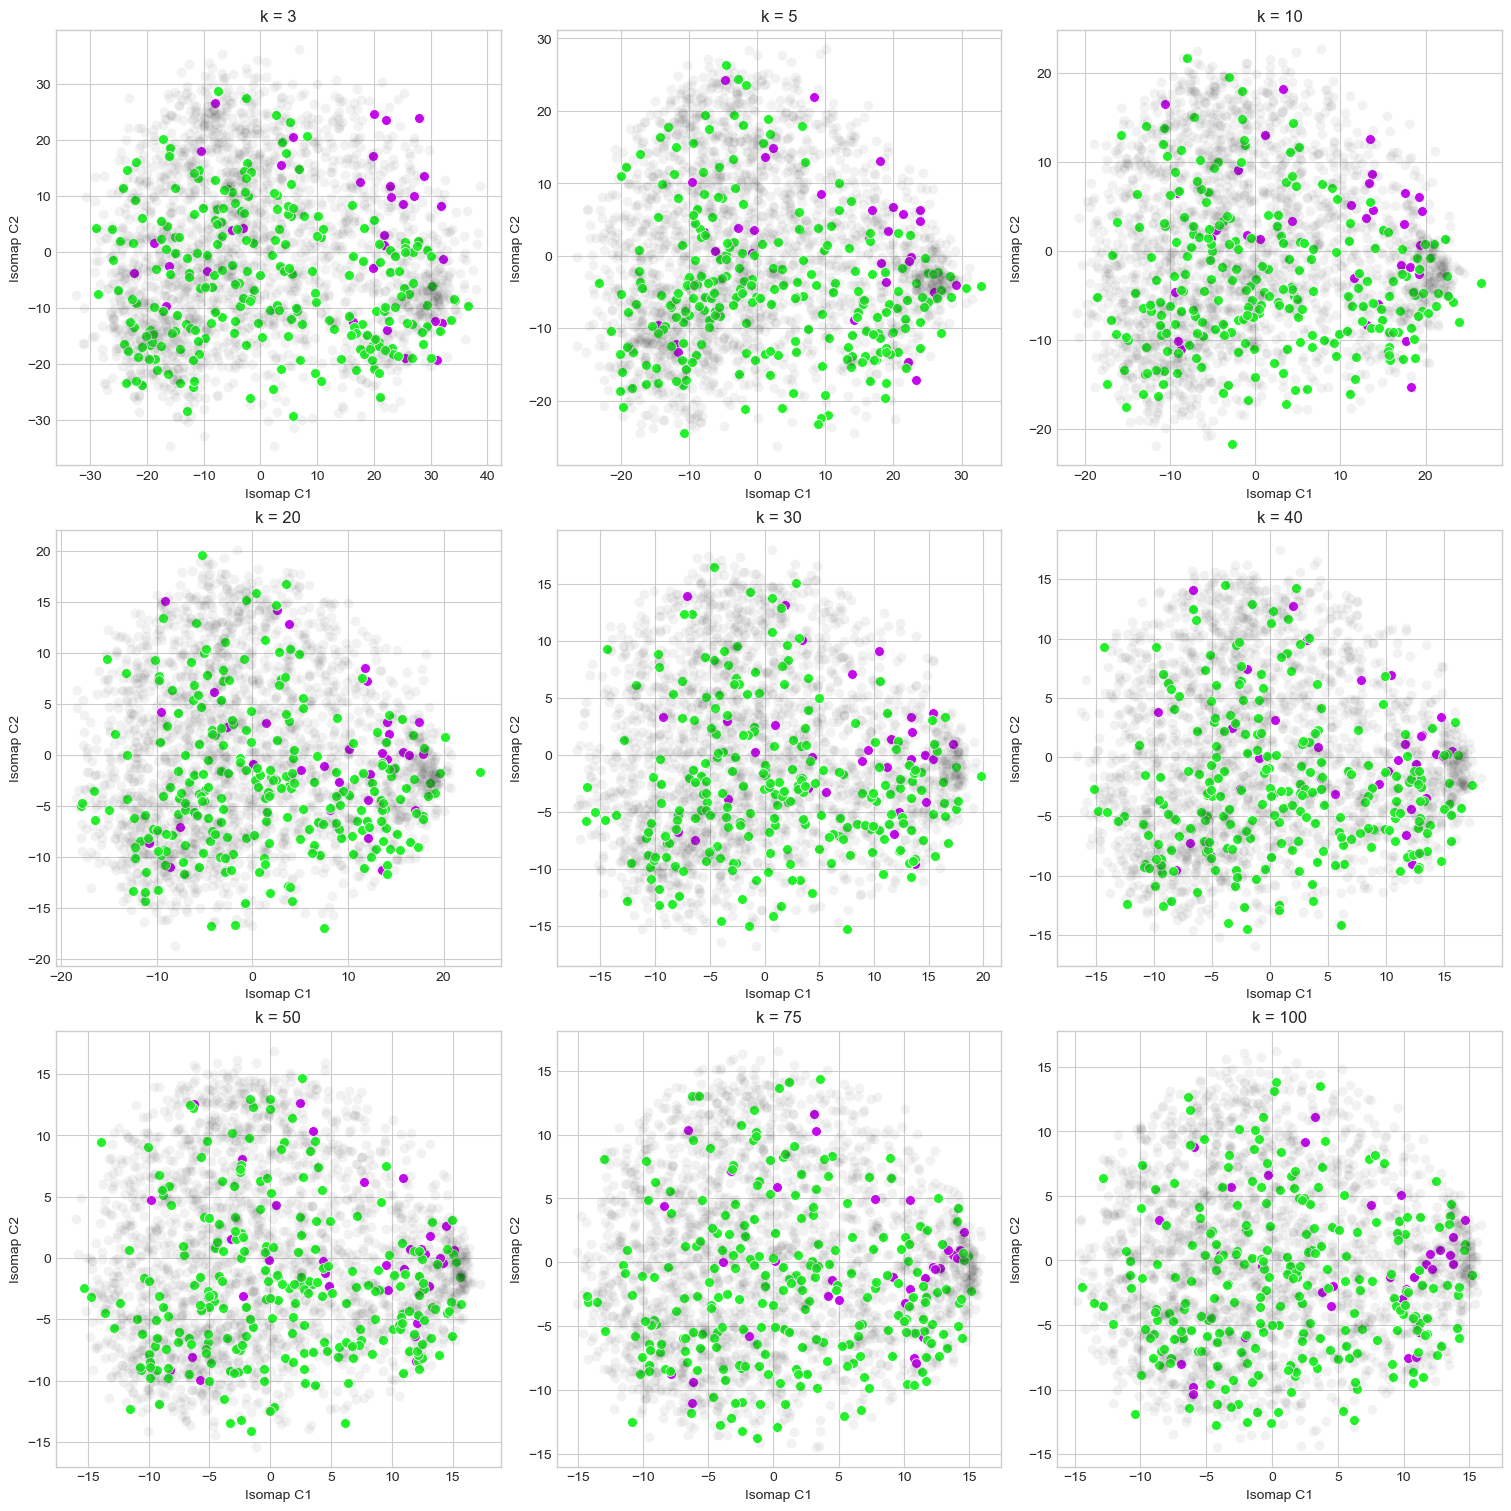

In [ ]:
from sklearn.manifold import Isomap

# Define the custom color palette
custom_palette = {
    'Class 1 Only': '#c507f0',  # Pink
    'Most Frequent Combination':  '#22f229',  # Green
    'Other':       '#0a0a0a'   # Black
}

# Define alpha values for each category
alpha_settings = {
    'Class 1 Only': 1.0,
    'Most Frequent Combination': 1.0,
    'Other':       0.05
}

def plot_isomap(X_scaled, Y_color_vector, n_neighbors, ax):
    """
    Applies Isomap and plots the 2D projection on a specified axes object.
    """
    # 1. Initialize and Fit Isomap
    isomap = Isomap(n_components=2, n_neighbors=n_neighbors)
    X_isomap = isomap.fit_transform(X_scaled)
    
    # 2. Create DataFrame for plotting
    df_isomap = pd.DataFrame(X_isomap, columns=['Isomap_C1', 'Isomap_C2'])
    df_isomap['Label'] = Y_color_vector

    # 3. Plotting the result
    for label, color in custom_palette.items():
        subset_df = df_isomap[df_isomap['Label'] == label]
        sns.scatterplot(
            x='Isomap_C1', 
            y='Isomap_C2', 
            data=subset_df,
            color=color,
            s=50, 
            ax=ax,
            alpha=alpha_settings[label],
            marker='o',
            legend='full'
        )
    
    # Set the title and labels
    ax.set_title(f'k = {n_neighbors}', fontsize=12)
    ax.set_xlabel('Isomap C1', fontsize=10)
    ax.set_ylabel('Isomap C2', fontsize=10)
    ax.grid(True)


# --- Define 9 Cases and Create the Grid ---

# Define 9 n_neighbors values (common range from local to more global)
N_NEIGHBORS_CASES = [3, 5, 10, 20, 30, 40, 50, 75, 100]

# 3 rows, 3 columns, with a large figure size
fig, axes = plt.subplots(3, 3, figsize=(15, 15), constrained_layout=True)
axes = axes.flatten()

# Title and Story containers
main_title = 'Comparative Isomap Visualization Across 9 Nearest Neighbors (k) Values'

# Loop through all 9 n_neighbors values and plot each one
for i, n_n in enumerate(N_NEIGHBORS_CASES):
    # Pass the current subplot axis to the plotting function
    plot_isomap(X_scaled, Y_color_vector, n_n, axes[i])

plt.show()

#### Analysis of Isomap Plots for Various k-Values

The hyperparameter **k** (or `n_neighbors`) in Isomap defines how many nearest neighbors are used to construct the initial graph of the manifold. The choice of `k` is crucial for correctly estimating the geodesic distances.

* **Low k (k = 3, 5, 10):**
    At these values, the neighborhood graph is too sparse. The algorithm fails to see the true underlying manifold, causing it to "tear" or break. This results in a distorted visualization where clusters are incorrectly ripped apart, and we see strange, elongated tendrils. The global structure is not correctly captured because the manifold is perceived as being disconnected.

* **Medium k (k = 20, 30, 40):**
    This range appears to be the sweet spot for our data. The neighborhood graph is well-connected enough to provide a stable and reliable estimate of the manifold's structure. The plots for **k=30** and **k=40** show a coherent global shape, with the different categories of points clearly visible. The overall structure is preserved without the distortions seen at lower `k` values.

* **High k (k = 50, 75, 100):**
    As `k` becomes very large, Isomap starts to lose some of the fine, non-linear details. By connecting to so many neighbors, the algorithm can create "short-circuits" across the folds of the manifold, causing the geodesic distance to approximate the simpler straight-line Euclidean distance. This results in a more compact, blob-like structure that can obscure some of the interesting underlying geometry.

**Conclusion:** For our dataset, a **'k' value of 40** seems most appropriate, as it successfully captures the global data structure without the tearing artifacts of a low `k` or the over-smoothing of a high `k`.

#### Isomap vs. t-SNE: Global vs. Local Structure

The fundamental difference between Isomap and t-SNE lies in what aspect of the data's structure they prioritize preserving.

**Isomap (Isometric Mapping)** is primarily concerned with preserving the **global structure** of the data.
- **How it works:** Isomap is a manifold learning technique that assumes the data lies on a complex, curved surface (a manifold) within the high-dimensional space. Its goal is to "unroll" this surface into a flat 2D map. It achieves this by preserving the **geodesic distance**—the shortest path between two points *along the manifold's surface*, rather than the straight-line distance through the high-dimensional space.
- **Analogy:** Imagine finding the distance between two cities on a globe. Isomap calculates the distance a ship would travel along the Earth's curved surface (geodesic), whereas a simpler method might calculate the useless straight-line path drilling through the Earth. By preserving these long-range surface distances, it maintains the overall global geometry of the data.

**t-SNE (t-Distributed Stochastic Neighbor Embedding)** is primarily concerned with preserving the **local structure**.
- **How it works:** t-SNE is a probabilistic method. It focuses on ensuring that points that are close neighbors in the high-dimensional space remain close neighbors in the 2D map. It is excellent at visualizing the tight clustering of local neighborhoods.
- **The trade-off:** It achieves this at the expense of global structure. The relative positions and distances between large, separate clusters in a t-SNE plot are often not meaningful. It prioritizes keeping friend groups together but doesn't care much about where the different groups are located in the room.

**In short: We should use Isomap to see the overall landscape of our data manifold and we should use t-SNE to see the fine-grained clusters within that landscape.**

## Visualization

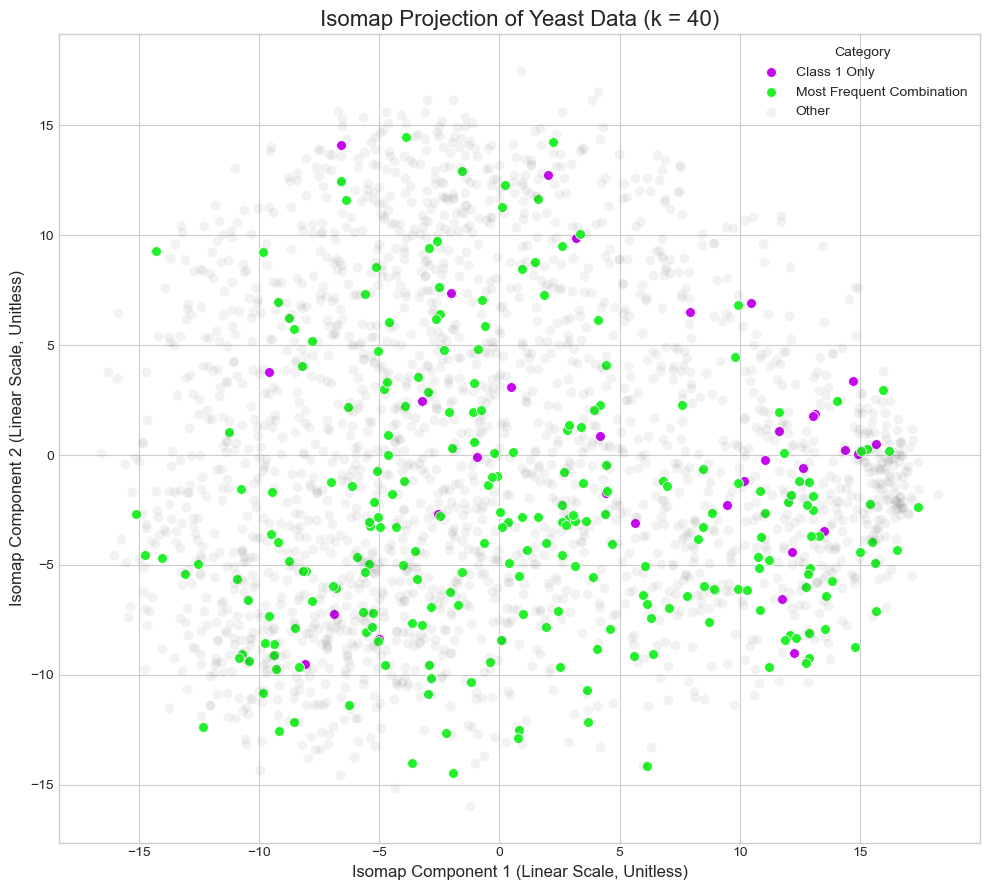

In [ ]:
# Define the custom color palette
custom_palette = {
    'Class 1 Only': '#c507f0',  # Pink
    'Most Frequent Combination':  '#22f229',  # Green
    'Other':       '#0a0a0a'   # Black
}

# Define alpha values for each category
alpha_settings = {
    'Class 1 Only': 1.0,
    'Most Frequent Combination': 1.0,
    'Other':       0.05
}

def plot_single_isomap(X_scaled, Y_color_vector, n_neighbors):
    """
    Applies Isomap and generates a single, color-coded visualization plot 
    for a specified n_neighbors value.
    """
    # Set the plotting style
    plt.style.use('seaborn-v0_8-whitegrid')
    
    # 1. Initialize and Fit Isomap
    isomap = Isomap(n_components=2, n_neighbors=n_neighbors)
    X_isomap = isomap.fit_transform(X_scaled)
    
    # 2. Create DataFrame for plotting
    df_isomap = pd.DataFrame(X_isomap, columns=['Isomap_C1', 'Isomap_C2'])
    df_isomap['Label'] = Y_color_vector

    # 3. Initialize Figure
    fig, ax = plt.subplots(figsize=(10, 10))
    
    # 4. Plotting each category separately to control alpha (opacity)
    for label, color in custom_palette.items():
        subset_df = df_isomap[df_isomap['Label'] == label]
        
        # Use a list of colors (one color) and set the alpha separately
        sns.scatterplot(
            x='Isomap_C1', 
            y='Isomap_C2', 
            data=subset_df,
            color=color, # Pass the color directly
            s=50, 
            ax=ax,
            alpha=alpha_settings[label], # Apply specific alpha
            marker='o',
            label=label # Use label for the manual legend entry
        )
    
    # 5. Apply Visualization Rules
    title_text = f'Isomap Projection of Yeast Data (k = {n_neighbors})'
    
    ax.set_title(title_text, fontsize=16)
    
    ax.set_xlabel('Isomap Component 1 (Linear Scale, Unitless)', fontsize=12)
    ax.set_ylabel('Isomap Component 2 (Linear Scale, Unitless)', fontsize=12)
    ax.grid(True)
    
    # Finalize Legend 
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles=handles, labels=labels, title='Category', loc='best', fontsize=10)
    
    plt.tight_layout(rect=[0, 0.05, 1, 0.95])
    plt.show()

# Plot Isomap using the common optimal n_neighbors value
plot_single_isomap(X_scaled, Y_color_vector, n_neighbors=40)

#### Interpretation of the Plot

This visualization tells a story about the overall landscape of our data, focusing on how different categories relate to each other on a large scale.

- **A Single, Connected Manifold:** The most striking feature is that almost all the data points, regardless of category, form one large, continuous cloud. This indicates that, from a global perspective, the different functional classes are not distinctly separate islands. Instead, they exist on a single, connected feature manifold.

- **'Most Frequent Combination' (Green):** These points are spread widely across the entire manifold. This is a crucial insight when compared to a t-SNE plot. While t-SNE showed this category forming tight *local* clusters, Isomap reveals that these local clusters are not globally distant from one another. They represent different regions within the same overarching data structure.

- **'Class 1 Only' (Magenta):** While many of these points are mixed in with the main cloud, there is a noticeable concentration on the **right side of the plot** (where Isomap Component 1 is positive). This suggests that a significant subset of the 'Class 1 Only' proteins shares some global characteristics that pull them to one edge of the data manifold, making them structurally distinct from the bulk of the other proteins.

**In summary, the Isomap projection shows that while our data has clear local clustering (as seen in t-SNE), the global view is one of a single, connected spectrum of features. The 'Most Frequent Combination' class is integral to this entire spectrum, while a portion of the 'Class 1 Only' class occupies a more distinct region on the periphery.**

## Comparison and Curvature

#### Comparison: Global Structure

**Isomap is better at revealing the global structure of the gene expression data.**

* **t-SNE (Local View):** The t-SNE plot excels at showing **local clustering**. It clearly visualizes the 'Most Frequent Combination' (green) points forming several tight, distinct groups. However, the spatial relationship *between* these large clusters in the t-SNE plot is not reliable. It tells us *that* clusters exist, but not how they are arranged in the overall data landscape.

* **Isomap (Global View):** The Isomap plot, by preserving the **geodesic distances** between all points, provides a much more faithful representation of the data's global geometry. It shows that the tight local clusters seen in t-SNE are not separate "islands" of data. Instead, they are all part of a single, large, continuous structure. Isomap "unrolls" the data manifold to reveal this single, connected "continent" of data points, which is the true global structure.

#### The Data Manifold and Its Complexity

The **data manifold** is the underlying, lower-dimensional surface on which the high-dimensional data points are thought to lie. Think of a crumpled sheet of paper (a 2D surface, or manifold) existing in 3D space. Isomap's goal is to carefully flatten this sheet to see its true shape.

- **Is the Manifold Complex?** The Isomap plot suggests the manifold is **curved, but not excessively complex**. The fact that a non-linear method like Isomap was required to produce this coherent structure implies the manifold is not a simple flat plane. However, the result is a single, contiguous cloud rather than multiple disconnected pieces or a highly twisted shape. This indicates the manifold is largely connected and continuous.

- **Complexity and Classification:** The complexity of the manifold directly relates to the difficulty of classification.
    - On a **simple, flat manifold**, different classes might occupy distinct regions that can be easily separated by a straight line (a linear classifier).
    - On a **curved manifold**, as seen here, the classes are intermingled. A straight line cannot effectively separate the green and magenta points because the boundary between them is inherently curved, following the shape of the manifold itself. A simple classifier would fail because the classes are not linearly separable. The intrinsic curvature of the data's structure forces the categories to overlap, meaning a more sophisticated, **non-linear model** is required to learn the complex boundary needed for accurate classification.

# Conclusion

This analysis successfully employed non-linear dimensionality reduction techniques to explore the complex structure of the Yeast dataset. Through the justified application of **t-SNE** and **Isomap**, coupled with carefully designed visualizations, critical insights were uncovered regarding the data's underlying manifold, its veracity, and the subsequent implications for predictive modeling.

The investigation shows a clear distinction between the two algorithms. **t-SNE** was used to reveal the dataset's **local structure**, identifying tight, coherent clusters within the 'Most Frequent Combination' class. In contrast, **Isomap** provided a complementary view of the **global structure**, showing that these local clusters all reside on a single, continuous data manifold rather than being truly separate entities.

This dual-perspective approach enabled an insightful analysis of data veracity, leading to the identification of several key challenges:
- **Noisy Labels:** Points of one class were found deeply embedded within clusters of another, suggesting potential labeling errors.
- **Outliers:** Isolated points on the periphery of the manifold were identified, indicating unique or potentially anomalous data samples.
- **Hard-to-Learn Samples:** Significant regions of class overlap were observed in both visualizations, highlighting areas where categories are not easily separable.

These findings have profound implications for classification model performance. The identified data veracity issues would directly challenge a predictive model. **Noisy labels** risk corrupting the learning process, leading to a flawed decision boundary. **Outliers** may be consistently misclassified or could unduly influence the model. Most importantly, the extensive **class overlap** on the data manifold suggests that the problem is not linearly separable. A simple classifier would struggle immensely in these mixed regions, resulting in high error rates.

Ultimately, this exploratory analysis proves that a robust, non-linear classification model is essential for this dataset.